In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,cross_val_score
#model selection from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#pca
from sklearn.decomposition import PCA
#data_balance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.chdir(r'C:\Users\VISHY\Desktop\Great Learning\Capstone\Vehicle-Loan-Default-Prediction\Data')

df = pd.read_csv('train.csv')

df=df.drop(['UniqueID', 'branch_id','supplier_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag'],axis=1)

In [3]:
def credit_risk(df):
    d1=[]
    d2=[]
    for i in df:
        p = i.split("-")
        if len(p) == 1:
            d1.append(p[0])
            d2.append('unknown')
        else:
            d1.append(p[1])
            d2.append(p[0])

    return d1,d2

risk_map = {'No Bureau History Available':-1, 
              'Not Scored: No Activity seen on the customer (Inactive)':-1,
              'Not Scored: Sufficient History Not Available':-1,
              'Not Scored: No Updates available in last 36 months':-1,
              'Not Scored: Only a Guarantor':-1,
              'Not Scored: More than 50 active Accounts found':-1,
              'Not Scored: Not Enough Info available on the customer':-1,
              'Very Low Risk':4,
              'Low Risk':3,
              'Medium Risk':2, 
              'High Risk':1,
              'Very High Risk':0}

sub_risk = {'unknown':-1, 'A':13, 'B':12, 'C':11,'D':10,'E':9,'F':8,'G':7,'H':6,'I':5,'J':4,'K':3, 'L':2,'M':1}
employment_map = {'Self employed':0, 'Salaried':1,np.nan:2}

df.loc[:,'credit_risk'],df.loc[:,'credit_risk_grade']  = credit_risk(df["PERFORM_CNS.SCORE.DESCRIPTION"])
df.loc[:,'credit_risk_label'] = df['credit_risk'].apply(lambda x: risk_map[x])
df.loc[:,'sub_risk_label'] = df['credit_risk_grade'].apply(lambda x: sub_risk[x])

df.loc[:,'employment_label'] = df['Employment.Type'].apply(lambda x: employment_map[x])

df=df.drop(['PERFORM_CNS.SCORE.DESCRIPTION', 'credit_risk', 'credit_risk_grade','Employment.Type'],axis=1)

In [4]:
df.loc[:,'no_of_accts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']

df.loc[:,'pri_inactive_accts'] = df['PRI.NO.OF.ACCTS'] - df['PRI.ACTIVE.ACCTS']
df.loc[:,'sec_inactive_accts'] = df['SEC.NO.OF.ACCTS'] - df['SEC.ACTIVE.ACCTS']
df.loc[:,'tot_inactive_accts'] = df['pri_inactive_accts'] + df['sec_inactive_accts']
df.loc[:,'tot_overdue_accts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']
df.loc[:,'tot_current_balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
df.loc[:,'tot_sanctioned_amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
df.loc[:,'tot_disbursed_amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']
df.loc[:,'tot_installment'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']

In [5]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [6]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)
#df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [7]:
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)
df['Age']=df['DisbursalDate']-df['Date.of.Birth']
df=df.drop(['DisbursalDate','Date.of.Birth'],axis=1)

In [8]:
y=df['loan_default']
x=df.drop('loan_default',axis=1)

In [9]:
sm = SMOTE(random_state=2)
x, y = sm.fit_sample(x, y.ravel())

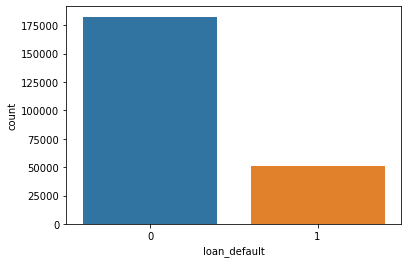

In [12]:
sns.countplot(df['loan_default'])

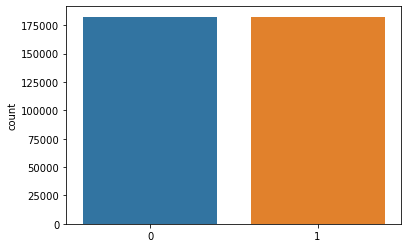

In [11]:
sns.countplot(y)

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [13]:
lr=LogisticRegression()
nb= GaussianNB()
knn=KNeighborsClassifier()
#dt=DecisionTreeClassifier(random_state=0, criterion='entropy')
#ranforest=RandomForestClassifier(random_state=0,n_estimators=43,criterion='gini')
#bag=BaggingClassifier(n_estimators=26, random_state=0)
#adab=AdaBoostClassifier(n_estimators=10)
#adabLog=AdaBoostClassifier(base_estimator=lr,n_estimators=5)
#gb=GradientBoostingClassifier(n_estimators=55)

In [98]:
var=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    random = RandomForestClassifier(criterion='entropy',n_estimators=i,random_state=0)
    scores=cross_val_score(random,xs,y,cv=3,scoring='f1_weighted')
    var.append(np.var(scores,ddof=1))
    print(i, np.var(scores,ddof=1))

1 0.008648236391435903
2 0.02265465987030196
3 0.013026850639533002
4 0.02386241092285923
5 0.015464493951098904
6 0.02406239922505945
7 0.01717104226516953
8 0.024219849794049335
9 0.01831375802085527
10 0.02448948010158176
11 0.01944208253465902
12 0.024584008002941575
13 0.02010504090774504
14 0.024645154234175216
15 0.0205082376232121
16 0.02450844095828984
17 0.02094559723538421
18 0.0246534395619105
19 0.021258405228966035
20 0.024555092985455353


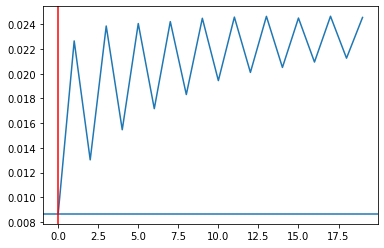

In [99]:
plt.plot(var)
plt.axhline(y=np.min(var))
np.min(var)
xx=np.arange(0,51)
max_x = xx[var.index(np.min(var))]
plt.axvline(max_x,color='r')

In [100]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['entropy','gini']}
ranforest=RandomForestClassifier(n_estimators=1,random_state=0)
grid=GridSearchCV(ranforest, params, cv=3, scoring='f1_weighted')
grid.fit(xs,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1, n_jobs=None,
                                              oob_score=False, random_state=0,
                                     

In [101]:
print(grid.best_score_)
print(grid.best_params_)

0.6910545967339704
{'criterion': 'entropy'}


In [102]:
rf=RandomForestClassifier(n_estimators=5,random_state=0, criterion='entropy')

0.7668042291328087

In [105]:
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    bag = BaggingClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(bag, xs, y, cv=kf)
    scores.append(np.var(results,ddof=1))
    print(i, np.var(results,ddof=1))

1 6.671109178491057e-07
2 8.240710323592161e-07
3 3.143802387301405e-07
4 2.1018623107860446e-07
5 5.048825018790187e-07
6 1.3597129661048715e-07
7 2.280473359876397e-08
8 9.904363651958438e-08
9 1.4349403763820084e-07
10 1.3564759747700236e-07
11 1.3703226471138712e-07
12 1.0890394431102687e-07
13 4.985357007815935e-07
14 2.3294799836536535e-07
15 2.718771828017704e-07
16 1.2376290632605604e-07
17 1.4089622308053458e-07
18 4.844475574425065e-07
19 3.330044832700756e-07
20 1.9617228186477665e-06


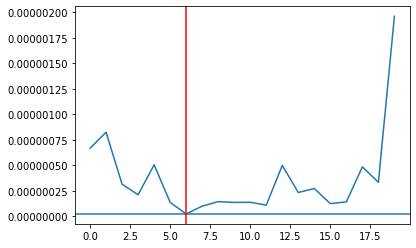

In [107]:
xx=np.arange(0,51)
plt.plot(scores)
plt.axhline(y=np.min(scores))
np.min(scores)
xx=np.arange(0,51)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [108]:
bag = BaggingClassifier(n_estimators=max_x, random_state=0)

0.7818874057301463

In [133]:
scores=[]
for i in np.arange(1,20):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    adab = AdaBoostClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(adab, xs, y, cv=kf, scoring='f1_weighted')
    scores.append(1-np.mean(results))
    print(i,1-np.mean(results))

1 0.43786055859010153
2 0.37921161452722807
3 0.37921161452722807
4 0.36287306814265363
5 0.35336345970497274
6 0.3431768966251759
7 0.33497048640280247
8 0.3261782825723264
9 0.31488717097896
10 0.3096866165328521
11 0.30585155804852127
12 0.3025212241215338
13 0.3049572527182711
14 0.29741338618020363
15 0.29649167210433747
16 0.2938702294643817
17 0.29304688747900587
18 0.29067449286026725
19 0.29175001883129104


In [134]:
len(scores)

19

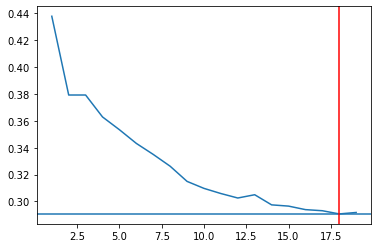

In [137]:
xx=np.arange(1,20)
plt.plot(xx,scores)
plt.axhline(np.min(scores))
np.min(scores)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [138]:
max_x

18

In [139]:
adab = AdaBoostClassifier(n_estimators=max_x, random_state=0)

0.7121048883370159

In [123]:
lr=LogisticRegression()
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    adab = AdaBoostClassifier(base_estimator=lr,n_estimators=i, random_state=0)
    results = cross_val_score(adab, xs, y, cv=kf, scoring='f1_weighted')
    scores.append(1-np.mean(results))
    print(i,1-np.mean(results))

1 0.3610520181913752
2 0.3494311053996282
3 0.34332589704153793
4 0.3392790058861045
5 0.3372403940853973
6 0.3357783285163465
7 0.33500921342212575
8 0.3343512137529757
9 0.3337845795787219
10 0.3333490377612909
11 0.3329624981725202
12 0.33239679188986904
13 0.3320183729897175
14 0.3317721640059643
15 0.33171832326484385
16 0.3315094069125527
17 0.33125491581165933
18 0.3308994942313742
19 0.33059666741005433
20 0.3303000410439165


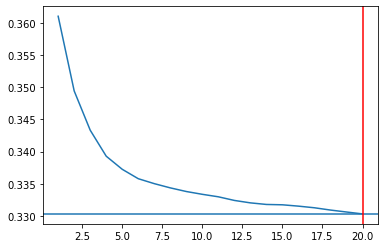

In [126]:
xx=np.arange(1,21)
plt.plot(xx,scores)
plt.axhline(np.min(scores))
np.min(scores)
max_x = xx[scores.index(np.min(scores))]
plt.axvline(max_x,color='r')

In [127]:
adablog = AdaBoostClassifier(base_estimator=lr,n_estimators=max_x, random_state=0)

0.6713383123641875

In [129]:
scores=[]
for i in np.arange(1,21):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    gb = GradientBoostingClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(gb, xs, y, cv=kf, scoring='f1_weighted')
    scores.append(1-np.mean(results))
    print(i,1-np.mean(results))

1 0.37921161452722807
2 0.37921161452722807
3 0.36656143054836876
4 0.35422000638427253
5 0.3401120626601779
6 0.3189669293230807
7 0.31707086932480166
8 0.31515101933702416
9 0.3099002598500521
10 0.3060687495655977
11 0.3009158400204063
12 0.29473920678625065
13 0.2957086310591742
14 0.29225156283809073
15 0.28935784488973226
16 0.287350987066299
17 0.28553157066712587
18 0.28463832429120484
19 0.28120038003024916
20 0.2802886556806422


In [131]:
gb = GradientBoostingClassifier(n_estimators=20, random_state=0)

0.7283202162043716

In [141]:
models=[]
models.append(('Log',lr))
models.append(('RF',rf))
models.append(('BAG',bag))
models.append(('AdaB',adab))
models.append(('LogisAdaB',adablog))
models.append(('GBoost',gb))
'''models.append(('Votingclass',vc))'''

"models.append(('Votingclass',vc))"

Log
0.6970897021521226   1.251692607452956e-07
RF
0.7318484645155948   0.0014498767799453643
BAG
0.7473238611381167   0.0014450723759460746
AdaB
0.7378242726385208   0.0013467172009511879
LogisAdaB
0.7241994099020334   0.0018537782103140664
GBoost
0.7234513989715874   0.0015306686029397706


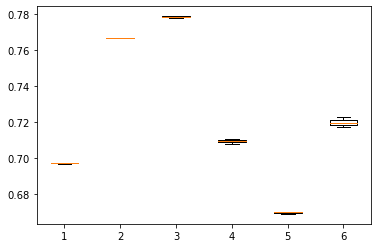

In [142]:
scores=[]
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for name,model in models:
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    cv_score=cross_val_score(model,xs,y,cv=kf,scoring='f1_weighted')
    scores.append(cv_score)
    print(name)
    print(np.mean(scores), " ",np.var(scores,ddof=1))
fig=plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(scores)
plt.show()